<center><h1>Power and Carbon Dioxide Emissions</h1></center>
<center><h2>CMSC320 Final Tutorial - Will Duis</h2></center>

<center><h3>Table of Contents</h3></center>
<ul>
<li><a href='#introduction'>Introduction</a></li>
<li><a href='#imports'>Imports</a></li>
<li><a href='#collection'>Part 1: Data Collection</a></li>
<li><a href='#processing'>Part 2: Data Processing</a>
  <ul>
  <li><a href='#gppdata'>Cleaning the GPP Data</a></li>
  <li><a href='#co2data'>Cleaning the CO<sup>2</sup> Data</a></li>
  <li><a href='#combine'>Combining the Data</a></li>
  <li><a href='#missing'>Missing Data</a></li>
  </ul>
</li>
<li><a href='#eda'>Part 3: Exploratory Data Analysis</a></li>
<li><a href='#learning'>Part 4: Machine Learning</a></li>
<li><a href='#insights'>Part 5: Insights</a></li>
</ul>

<center><h3 id='introduction'>Introduction</h3></center>

The climate of Earth is gradually becoming more and more extreme, largely due to humanity's overuse of fossil fuels for power generation.

This project will use the Python programming language to analyze the correlation between power generation and carbon dioxide emissions in 2017 using the data science pipeline. The year 2017 was picked because it is the most recent year in the available data.

This project will take you through the entire data science pipeline.

<center><h3 id='imports'>Imports</h3></center>

As mentioned above, this project is using the Python programming language. This includes several libraries, which are imported below.

In [74]:
# Basic data science libraries
import pandas as pd
import numpy as np

# Plotting data
import matplotlib.pyplot as plt

# Random number generation
import random

# Linear regression
from sklearn.linear_model import LinearRegression

Two of the most important libraries used in this project are <a href='https://pandas.pydata.org/'>pandas</a> and <a href='https://numpy.org/'>NumPy</a>. Both of these are open source libraries for Python that allow for the easy storage, manipulation, and usage of data.

As you can see, there are several other libraries used, but these will be explained when they are used.

<center><h3 id='collection'>Part 1: Data Collection</h3></center>

As with all data science, the first step is to collect the data you will be using. For this project, you will be using the following:
<ul>
<li>World Resource Institute's global power plant data (found <a href='https://datasets.wri.org/dataset/globalpowerplantdatabase'>here</a>)</li>
<li>Our World in Data's data on carbon dioxide emissions (found <a href='https://github.com/owid/co2-data'>here</a>)</li>
</ul>

In order to use the data, you must first read it into our Python notebook as a variable. To do this, you should use pandas. Its <a href='https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html'>read_csv()</a> method allows you to store a CSV file as a pandas <a href='https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html'>DataFrame</a>, which is essentially a table.

<br>

When reading your CSV files, remember to change the file path to match your device. Otherwise, you will have errors.

You can change the file paths by typing them into the form fields next to the code.

In [75]:
# Reads the CSV files into pandas DataFrames.
# Remember to change the file path before running the code!
gpp_data_file_path = "/content/drive/MyDrive/Colab Notebooks/CMSC320/Final Tutorial/global_power_plant_database.csv" # @param {type:"string"}
co2_data_file_path = "/content/drive/MyDrive/Colab Notebooks/CMSC320/Final Tutorial/owid-co2-data.csv" # @param {type:"string"}

gpp_data = pd.read_csv(gpp_data_file_path, low_memory=False)
co2_data = pd.read_csv(co2_data_file_path)

<center><h3 id='#processing'>Part 2: Data Processing</h3></center>

Although our data has been read, we cannot use it just yet. We must first make it usable by removing the excess data we do not need. This is commonly accomplished with pandas' <a href='https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.drop.html'>drop()</a> method, although this method is mostly not what is used below.

<center><h4 id='gppdata'>Cleaning the GPP Data</h4></center>

First, we will remove data from any power plants from after 2017.<br>
Second, we will remove data from all columns that this project will not use.
Third, we will rename the columns to match the CO<sup>2</sup> DataFrame.

In [76]:
# Removes data from all power plants from after 2017.
gpp_data = gpp_data[gpp_data['commissioning_year'] <= 2017]
# Removes all unused columns from the GPP dataset.
gpp_data = gpp_data[['country_long', 'country', 'primary_fuel', 'estimated_generation_gwh_2017']]
# Rename the columns to match the CO2 dataset.
gpp_data.columns = ['country', 'iso_code', 'primary_fuel', 'estimated_generation_gwh_2017']

After removing the excess data, we will now combine each power plant's data by its primary fuel. Pandas can do this with the <a href='https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.groupby.html'>groupby()</a> method. This results in a breakdown of each country's power generation by type.

After grouping, the DataFrame must be adjusted to remove MultiIndexes. This can be done with panda's <a href = 'https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.reset_index.html'>reset_index()</a> method.

In [77]:
# Group the data by country and fuel type.
gpp_data = gpp_data.groupby(['country', 'iso_code', 'primary_fuel']).sum()
# Remove the MultiIndex to fix the DataFrame.
gpp_data = gpp_data.reset_index(level=[0,1,2])

The <a href='https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.head.html'>head()</a> method from pandas returns the first few (by default, 5) rows of a DataFrame. This is useful for ensuring that pandas operations had their intended results.

In [78]:
# Use the head() method to display the top 5 rows of gpp_data.
gpp_data.head()

,country,iso_code,primary_fuel,estimated_generation_gwh_2017
0,Albania,ALB,Hydro,4608.91
1,Algeria,DZA,Gas,39867.96
2,Algeria,DZA,Hydro,30.82
3,Antarctica,ATA,Oil,0.00
4,Argentina,ARG,Coal,25107.35


<center><h4 id='co2data'>Cleaning the CO<sup>2</sup> Data</h4></center>

First, we should remove all data from the CO<sup>2</sup> DataFrame that is not from 2017, since that is the year we are focusing on.<br>
Second, we should remove all columns that this project will not use.

In [79]:
# Removes all non-2017 rows from the CO2 dataset.
co2_data = co2_data[co2_data['year'] == 2017]
# Removes all unused columns from the CO2 dataset.
co2_data = co2_data[['country', 'iso_code', 'population', 'co2']]

In [80]:
co2_data.head()

,country,iso_code,population,co2
167,Afghanistan,AFG,3.564342e+07,9.868
439,Africa,NaN,1.263334e+09,1379.490
611,Africa (GCP),NaN,NaN,1379.479
783,Aland Islands,ALA,NaN,NaN
955,Albania,ALB,2.879361e+06,5.564


<center><h4 id='combine'>Combining the Datasets</h4></center>

Now that the data from both sources has been cleaned, we will now merge them together. Pandas allows us to do this with the <a href='https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.merge.html'>merge()</a> method.

Merging, also called joining, combines two different DataFrames together on specific columns. Specifically, we will be using an inner join, which only outputs the rows that are in both DataFrames. To learn more about the other types of joining, see <a href='https://www.geeksforgeeks.org/different-types-of-joins-in-pandas/'>this GeeksforGeeks article</a>.

To make sure that the data lines up, we will be merging on the 'country' and 'iso_code' columns.

Afterward, we will rename the columns to reduce length using pandas' <a href='https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.rename.html'>rename()</a> method.

In [81]:
# Inner merge the two DataFrames on 'iso_code'.
data = co2_data.merge(gpp_data, how='inner', on=['iso_code'])
data = data.rename({'country_x': 'country','estimated_generation_gwh_2017': 'power'}, axis='columns')
data = data.drop('country_y', axis='columns')

In [82]:
# Show the combined data.
data.head()

,country,iso_code,population,co2,primary_fuel,power
0,Albania,ALB,2879361.0,5.564,Hydro,4608.91
1,Algeria,DZA,41136548.0,166.411,Gas,39867.96
2,Algeria,DZA,41136548.0,166.411,Hydro,30.82
3,Antarctica,ATA,NaN,NaN,Oil,0.00
4,Argentina,ARG,44054616.0,186.899,Coal,25107.35


<center><h4 id='missing'>Missing Data</h4></center>

Often when working with data, some of it is missing. We must deal with that now. First, it is convenient to check the dataset to see if there is any missing data.

A useful way to go through every row in a DataFrame is pandas' <a href='https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.iterrows.html'>iterrows()</a> method. It iterrates through rows as tuple pairs of the index and the row.

The <a href='https://pandas.pydata.org/docs/reference/api/pandas.isna.html'>isna()</a> method from pandas is also helpful here. It returns a Boolean value regarding if the input is missing or not.

The below code will print any rows from the data that have missing values.

In [83]:
# Checks for any missing data, and prints any rows that have missing data.
for row in data.iterrows():
  is_missing = False
  for i in row[1]:
    if pd.isna(i):
      is_missing = True
  if is_missing:
    print(row)
    print()

(3, country         Antarctica
iso_code               ATA
population             NaN
co2                    NaN
primary_fuel           Oil
power                  0.0
Name: 3, dtype: object)



As you can see, the only row with missing data is Antarctica, which does not have a stable population or carbon dioxide emissions. Because of this, and because it generated no power in 2017, it can safely be removed from the dataset.

In [84]:
# Removes Antarctica from the dataset.
data = data[data['country'] != 'Antarctica']

<center><h3 id='eda'>Part 3: Exploratory Data Analysis</h3></center>

Now that the data has been collected, cleaned, and processed, the next step in the data science pipeline is exploratory data analysis, or EDA. EDA allows the data scientist to analyze their data and its behavior to check for issues that may occur later.

An interesting metric would be to see how many countries use each type of power generation. First, for convenience, we should create a list of the different sources of power. The <a href='https://pandas.pydata.org/docs/reference/api/pandas.unique.html'>unique()</a> from pandas is helpful for this purpose.

In [85]:
for each in data['primary_fuel'].unique():
  print(each)

Hydro
Gas
Coal
Nuclear
Oil
Other
Wind
Biomass
Solar
Waste
Geothermal
Cogeneration
Petcoke
Storage


Next, we will count how many countries use each type of power.
Pandas can do this with the groupby() method (discussed earlier) and the <a href='https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.count.html'>count()</a> method. The count method simply returns the number of non-missing cells in a row or column. This example also uses pandas' <a href='https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.sort_values.html'>sort_values()</a> method, which does exactly what it sounds like, and the reset_index() method which was used earlier.

In [86]:
# Count the number of countries that use each power source, sorted in descending order.
# Note that countries can use multiple sources of power.
power_amounts = data.groupby('primary_fuel').count().sort_values(by=['country'], ascending=False)[['country']].reset_index(level=[0])
# Change the column names to make sense.
power_amounts.columns = ['power_type', 'count']

# Output the table.
power_amounts

,power_type,count
0,Hydro,63
1,Gas,57
2,Coal,49
3,Oil,37
4,Wind,33
5,Solar,24
6,Nuclear,16
7,Biomass,13
8,Geothermal,13
9,Waste,10


In addition to as a table, this data can also be presented as a graph for ease of visualization using the <a href='https://matplotlib.org/stable/tutorials/introductory/pyplot.html'>matplotlib.pyplot</a> library. This library contains powerful tools to visualize data.

This code will create and show a bar graph of the above data, using pyplot's <a href='https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.bar.html'>bar()</a> method.

Matplotlib also has several methods used for formatting, including the <a href='https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.title.html'>title()</a>, <a href='https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.xlabel.html'>xlabel()</a>, <a href='https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.xticks.html'>xticks()</a>, and <a href='https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.ylabel.html'>ylabel()</a> methods.

Finally, the <a href='https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.show.html'>show()</a> method is used to output the graph.

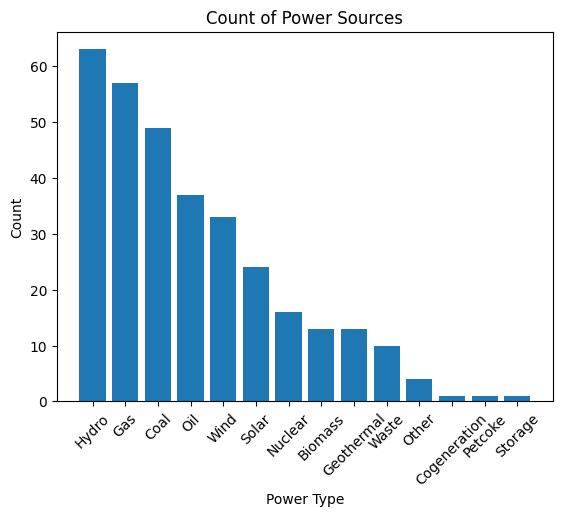

In [87]:
# Create a bar graph of the data for prevalence of fuel types.
plt.bar(power_amounts['power_type'], power_amounts['count'])

# Format the resulting bar graph.
plt.title('Count of Power Sources') # Changes the title of the graph.
plt.xlabel('Power Type') # Changes the label on the x-axis.
plt.xticks(rotation = 45) # Rotates the bar labels to improve readability.
plt.ylabel('Count') # Changes the label on the y-axis.

# Show the graph.
plt.show()

Interestingly, hydroelectric power is the most common individual type, although fossil fuels (gas, coal, and oil) as a group are much more prevalent.

Now, we will rank the power sources by total power generated, then create a graph in the same way as before.

In [88]:
# Get the amount of power generated by each power type.
power_generated = data.groupby(['primary_fuel']).sum(numeric_only=True).sort_values(by=['power'], ascending=False).reset_index([0])
power_generated = power_generated[['primary_fuel', 'power']]
power_generated.columns = ['power_type', 'power']

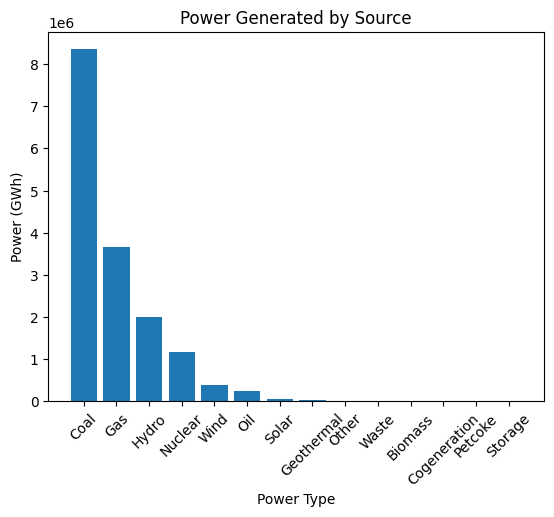

In [89]:
# Create a bar graph of the data for power of fuel types.
plt.bar(power_generated['power_type'], power_generated['power'])

# Format the resulting bar graph.
plt.title('Power Generated by Source') # Changes the title of the graph.
plt.xlabel('Power Type') # Changes the label on the x-axis.
plt.xticks(rotation = 45) # Rotates the bar labels to improve readability.
plt.ylabel('Power (GWh)') # Changes the label on the y-axis.

# Show the graph.
plt.show()

As expected, fossil fuels, specifically coal, generate the vast majority of the world's power, despite not having the most power plants.

Another interesting statistic would be to rank each country by carbon dioxide emissions. This can be done in a similar way to the previous graphs. The <a href='https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.drop_duplicates.html'>drop_duplicates()</a> method from pandas is used to get the accurate emissions levels for each country.

<br>

To improve the readability of the graph, only the top 10 countries are graphed.

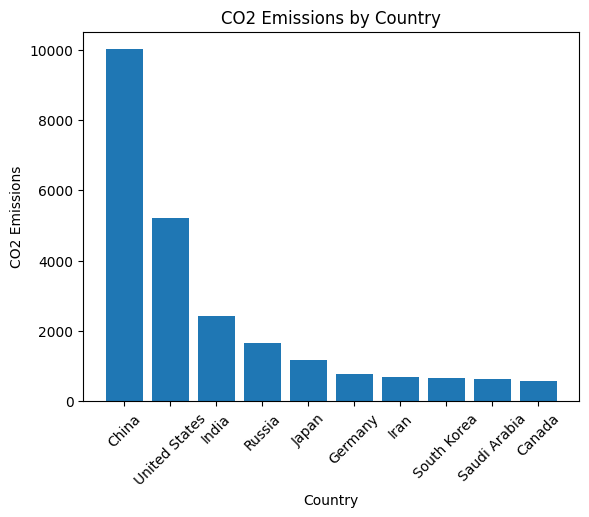

In [90]:
# Rank each country by CO2 emissions per capita.
co2_emissions = data.drop_duplicates(['country']).groupby(['country']).sum(numeric_only=True).sort_values(by=['co2'], ascending=False)
co2_emissions = co2_emissions.reset_index([0])[['country', 'co2']]
# Create a bar graph of CO2 emissions.
plt.bar(co2_emissions['country'][:10], co2_emissions['co2'][:10])

# Format the resulting bar graph.
plt.title('CO2 Emissions by Country') # Changes the title of the graph.
plt.xlabel('Country') # Changes the label on the x-axis.
plt.xticks(rotation = 45) # Rotates the bar labels to improve readability.
plt.ylabel('CO2 Emissions') # Changes the label on the y-axis.

# Show the graph.
plt.show()

As expected, China, the United States, and India are the top carbon dioxide emitters, simply by virtue of their large populations.

<center><h3 id='learning'>Part 4: Machine Learning</h3></center>

During this phase of the data science pipeline, various methods are used to generate a model of the data. For this project, we will use linear regression to model the world's power generation against its carbon emissions.

Linear regression is the process of finding a line that best matches the available data. A common way of calculating this line is the least squares method, which aims to minimize the square of the differences between each point and the line.

For convenience, we will now condence the separate power types into a singular measure of power generated, using pandas' <a href='https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.copy.html'>copy()</a> method to do so.

In [91]:
# Make a deep copy of the data, then combine the different power types into a single column called total_power.
combined_data = data.copy(deep=True)
combined_data = combined_data.drop(['primary_fuel'], axis='columns')
combined_data = data.groupby(['country', 'iso_code']).sum(numeric_only=True).reset_index([0, 1])
combined_data = combined_data.rename({'power': 'total_power'}, axis='columns')

# Show the reformatted data.
combined_data.head()

,country,iso_code,population,co2,total_power
0,Albania,ALB,2879361.0,5.564,4608.91
1,Algeria,DZA,82273096.0,332.822,39898.78
2,Argentina,ARG,264327696.0,1121.394,111215.84
3,Armenia,ARM,8555787.0,16.620,4631.30
4,Austria,AUT,26392491.0,208.779,34281.80


Before we begin the process of linear regression, we must standardize our data by subtracting the mean, then dividing by the standard deviation. This is done to equalize the impact of each variable, so that no single variable has undue bias on the results.

We will use NumPy's <a href='https://numpy.org/doc/stable/reference/generated/numpy.mean.html'>mean()</a> and <a href='https://numpy.org/doc/stable/reference/generated/numpy.std.html'>std()</a> methods for this.

In [92]:
# Standardize the power generation and CO2 emissions columns.
standard_data = combined_data.copy(deep=True)
standard_data['co2'] = (standard_data['co2'] - np.mean(standard_data['co2'])) / np.std(standard_data['co2'])
standard_data['total_power'] = (standard_data['total_power'] - np.mean(standard_data['total_power'])) / np.std(standard_data['total_power'])

# Show the standardized data.
standard_data.head()

,country,iso_code,population,co2,total_power
0,Albania,ALB,2879361.0,-0.242321,-0.233495
1,Algeria,DZA,82273096.0,-0.209040,-0.184069
2,Argentina,ARG,264327696.0,-0.128843,-0.084186
3,Armenia,ARM,8555787.0,-0.241197,-0.233463
4,Austria,AUT,26392491.0,-0.221655,-0.191936


Before performing linear regression, we must have a plot of data to use.
We will use matplotlib.pyplot's <a href='https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html'>scatter()</a> method to create a scatterplot of power generation against carbon dioxide emissions.

Formatting is done using the same methods as with the bar graphs from earlier.

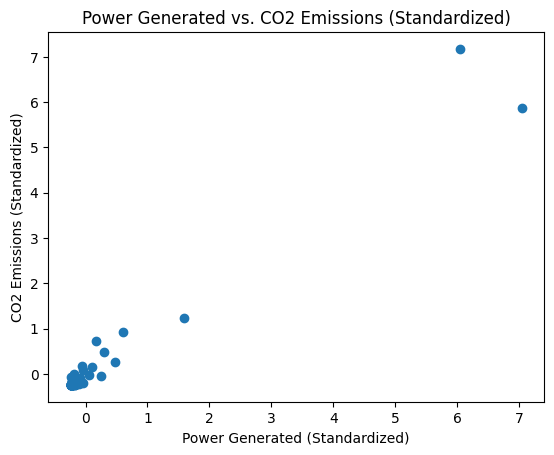

In [93]:
# Use matplotlib.pyplot.scatter() to create a scatterplot.
plt.scatter(standard_data['total_power'], standard_data['co2'])
# Format the scatterplot.
plt.title('Power Generated vs. CO2 Emissions (Standardized)')
plt.xlabel('Power Generated (Standardized)')
plt.ylabel('CO2 Emissions (Standardized)')

# Show the scatterplot.
plt.show()

Next, we will be using stochastic gradient descent to perform ordinary least squares linear regression. Stochastic gradient descent (SGD) gradually optimizes the parameters for the line by repeatedly picking a random number of rows, then changing the parameters based on those rows to minimize loss. To learn more, see <a href='https://en.wikipedia.org/wiki/Stochastic_gradient_descent'>here</a>.

The process of stochastic gradient descent is done with the <a href='https://scikit-learn.org/stable/'>sklearn</a> library and its <a href='https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html'>LinearRegression</a> object.

In [94]:
# Create the LinearRegression object.
reg = LinearRegression()
# Train the LinearRegression object on the above plot.
reg.fit(standard_data[['total_power']], standard_data[['co2']])

# Print the slope and intercept of the fitted model.
print("Slope: " + str(reg.coef_[0]))
print("Intercept: " + str(reg.intercept_))

Slope: [0.98052749]
Intercept: [5.34124587e-17]


The next step is to plot the line with the above scatterplot using matplotlib.pyplot's <a href='https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html'>plot()</a> method.

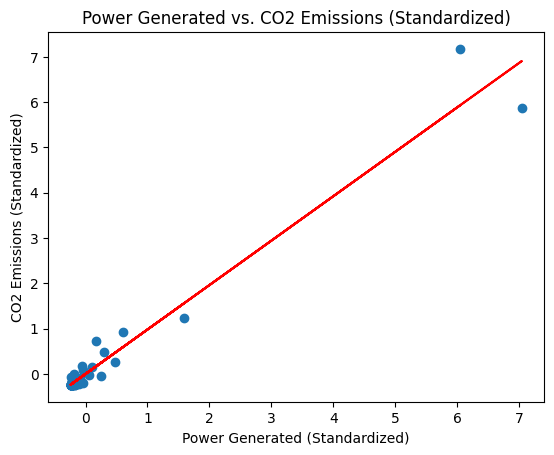

In [95]:
# Use matplotlib.pyplot.scatter() to create a scatterplot.
plt.scatter(standard_data['total_power'], standard_data['co2'])

# Plot the line from the linear regression.
plt.plot(standard_data['total_power'], reg.coef_[0] * standard_data['total_power'] + reg.intercept_, color='r')
plt.title('Power Generated vs. CO2 Emissions (Standardized)')
plt.xlabel('Power Generated (Standardized)')
plt.ylabel('CO2 Emissions (Standardized)')

# Show the scatterplot with its line of best fit.
plt.show()

As you can see, the power generated and the carbon dioxide emissions are rather highly positively correlated. Because the slope is close to 1, these two quantities increase at about the same rate.

Now that we have shown this connection, it might be useful to plot the non-standardized data, using the same code and methods as above.

In [96]:
# Create the LinearRegression object.
reg2 = LinearRegression()
# Train the LinearRegression object on the above plot.
reg2.fit(combined_data[['total_power']], combined_data[['co2']])

# Print the slope and intercept of the fitted model.
print("Slope: " + str(reg2.coef_[0]))
print("Intercept: " + str(reg2.intercept_))

Slope: [0.01350349]
Intercept: [74.82795873]


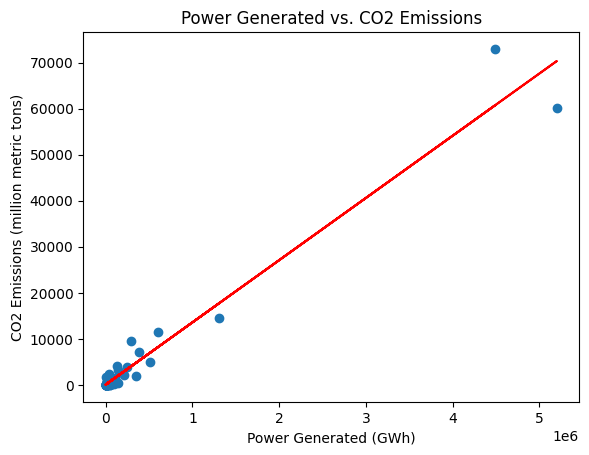

In [97]:
# Use matplotlib.pyplot.scatter() to create a scatterplot.
plt.scatter(combined_data['total_power'], combined_data['co2'])

# Plot the line from the linear regression.
plt.plot(combined_data['total_power'], reg2.coef_[0] * combined_data['total_power'] + reg2.intercept_, color='r')
plt.title('Power Generated vs. CO2 Emissions')
plt.xlabel('Power Generated (GWh)')
plt.ylabel('CO2 Emissions (million metric tons)')

# Show the scatterplot with its line of best fit.
plt.show()

On average, for every additional GWh of power generated, about an extra 13,500 metric tons of carbon dioxide are released.

<center><h3 id='insights'>Part 5: Insights</h3></center>

Clearly, power generation and carbon dioxide emissions are positively correlated. This was not an unexpected result, and it shows that a main way for individual countries to reduce their CO<sup>2</sup> emissions is to reduce their power generation and consumption.

Obviously, the world needs more than that. As seen by the recent record-breaking heat waves from this summer, the planet needs fixing.

On an implementation-related note, I tried to implement my function for stochastic gradient descent from Project 4 to use instead of sklearn, but I couldn't get the matrices to be aligned.

<center><small><a href='#top'>Jump to Top</a></small></center>